In [2]:
# Import the datetime module from the datetime library.
from datetime import datetime
import pandas as pd
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2500)
lat_lngs = zip(lats, lngs)
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

In [4]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [27]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Add 1 to the record count.
    record_count += 1

Processing Record 13 of Set 13 | jamestown
Processing Record 14 of Set 13 | busselton
Processing Record 15 of Set 13 | kapaa
Processing Record 16 of Set 13 | saint-philippe
Processing Record 17 of Set 13 | port alfred
Processing Record 18 of Set 13 | lebu
Processing Record 19 of Set 13 | pevek
Processing Record 20 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 13 | hirado
Processing Record 22 of Set 13 | vaini
Processing Record 23 of Set 13 | ushuaia
Processing Record 24 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 25 of Set 13 | tabiauea
City not found. Skipping...
Processing Record 26 of Set 13 | yellowknife
Processing Record 27 of Set 13 | dwarka
Processing Record 28 of Set 13 | cherskiy
Processing Record 29 of Set 13 | beli manastir
Processing Record 30 of Set 13 | tura
Processing Record 31 of Set 13 | puerto ayora
Processing Record 32 of Set 13 | byron bay
Processing Record 33 of Set 13 | jutai
Processing Record 34 of Se

Processing Record 33 of Set 16 | bambanglipuro
Processing Record 34 of Set 16 | kamina
Processing Record 35 of Set 16 | panzhihua
Processing Record 36 of Set 16 | dikson
Processing Record 37 of Set 16 | phangnga
Processing Record 38 of Set 16 | atambua
Processing Record 39 of Set 16 | bathsheba
Processing Record 40 of Set 16 | ahipara
Processing Record 41 of Set 16 | provideniya
Processing Record 42 of Set 16 | agen
Processing Record 43 of Set 16 | puri
Processing Record 44 of Set 16 | praia da vitoria
Processing Record 45 of Set 16 | santa fe
Processing Record 46 of Set 16 | hearst
Processing Record 47 of Set 16 | ratnagiri
Processing Record 48 of Set 16 | kamenskoye
City not found. Skipping...
Processing Record 49 of Set 16 | yerbogachen
Processing Record 50 of Set 16 | anderlues
Processing Record 1 of Set 17 | lucea
Processing Record 2 of Set 17 | salalah
Processing Record 3 of Set 17 | los barrios
Processing Record 4 of Set 17 | hasaki
Processing Record 5 of Set 17 | karakendzha
Ci

Processing Record 19 of Set 20 | emba
Processing Record 20 of Set 20 | ejura
Processing Record 21 of Set 20 | brae
Processing Record 22 of Set 20 | palabuhanratu
City not found. Skipping...
Processing Record 23 of Set 20 | jiwani
Processing Record 24 of Set 20 | peru
Processing Record 25 of Set 20 | karaul
City not found. Skipping...
Processing Record 26 of Set 20 | lompoc
Processing Record 27 of Set 20 | deputatskiy
Processing Record 28 of Set 20 | yuci
Processing Record 29 of Set 20 | bakchar
Processing Record 30 of Set 20 | warqla
City not found. Skipping...
Processing Record 31 of Set 20 | coihaique
Processing Record 32 of Set 20 | alakurtti
Processing Record 33 of Set 20 | ancud
Processing Record 34 of Set 20 | sapa
Processing Record 35 of Set 20 | santa marta
Processing Record 36 of Set 20 | roald
Processing Record 37 of Set 20 | tautira
Processing Record 38 of Set 20 | fershampenuaz
Processing Record 39 of Set 20 | traralgon
Processing Record 40 of Set 20 | vila franca do campo


Processing Record 4 of Set 24 | asau
Processing Record 5 of Set 24 | constitucion
Processing Record 6 of Set 24 | kabo
Processing Record 7 of Set 24 | sioux lookout
Processing Record 8 of Set 24 | ankazoabo
Processing Record 9 of Set 24 | kyra
Processing Record 10 of Set 24 | port macquarie
Processing Record 11 of Set 24 | ankang
Processing Record 12 of Set 24 | prince rupert
Processing Record 13 of Set 24 | yomitan
City not found. Skipping...
Processing Record 14 of Set 24 | margate
Processing Record 15 of Set 24 | kuala terengganu
Processing Record 16 of Set 24 | sumenep
Processing Record 17 of Set 24 | gimli
Processing Record 18 of Set 24 | akdepe
Processing Record 19 of Set 24 | wajima
Processing Record 20 of Set 24 | talcahuano
Processing Record 21 of Set 24 | namatanai
Processing Record 22 of Set 24 | diffa
Processing Record 23 of Set 24 | letenye
Processing Record 24 of Set 24 | anloga
Processing Record 25 of Set 24 | urcos
Processing Record 26 of Set 24 | russell
Processing Rec

In [7]:


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,75.29,49,1,0.00,US,2021-09-19 20:53:47
1,Busselton,-33.6500,115.3333,47.05,81,0,11.12,AU,2021-09-19 20:57:36
2,Kapaa,22.0752,-159.3190,80.58,73,68,1.99,US,2021-09-19 20:56:19
3,Saint-Philippe,-21.3585,55.7679,65.79,68,6,6.87,RE,2021-09-19 20:55:53
4,Port Alfred,-33.5906,26.8910,61.47,81,77,8.50,ZA,2021-09-19 20:56:05


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

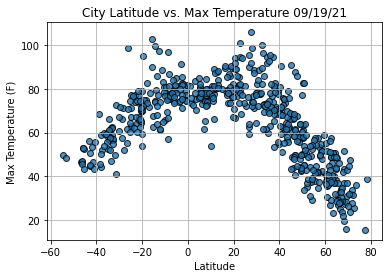

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

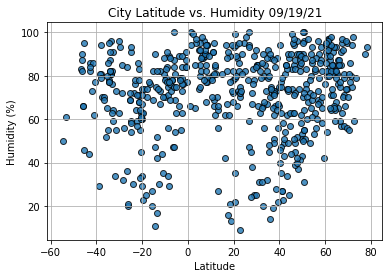

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

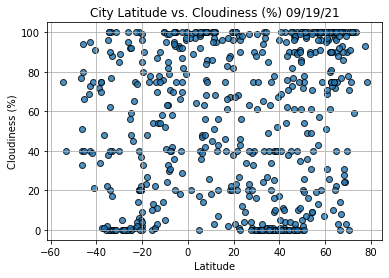

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

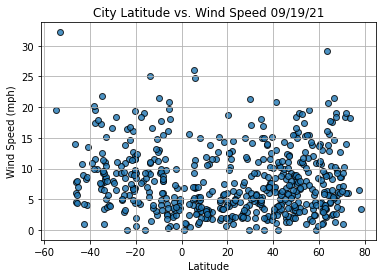

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,75.29,49,1,0.00,US,2021-09-19 20:53:47
2,Kapaa,22.0752,-159.3190,80.58,73,68,1.99,US,2021-09-19 20:56:19
6,Pevek,69.7008,170.3133,30.99,74,90,8.55,RU,2021-09-19 20:57:37
7,Hirado,33.3597,129.5531,73.06,80,0,4.32,JP,2021-09-19 20:57:38
10,Yellowknife,62.4560,-114.3525,48.72,71,75,3.44,CA,2021-09-19 20:57:40


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

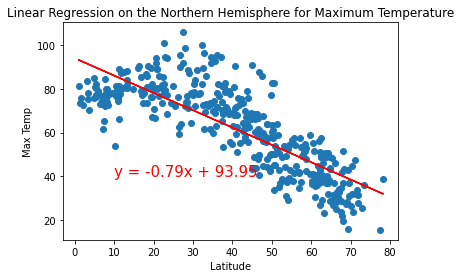

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

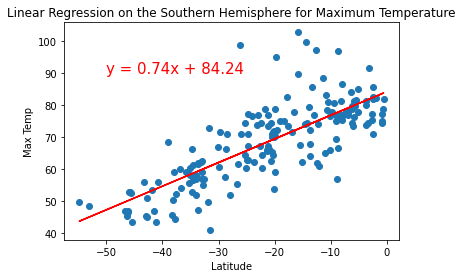

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

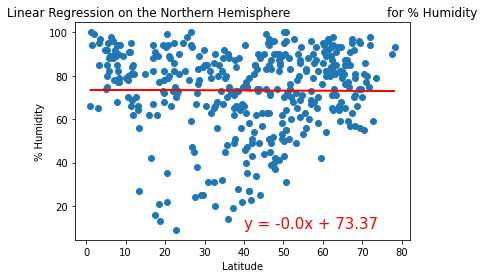

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

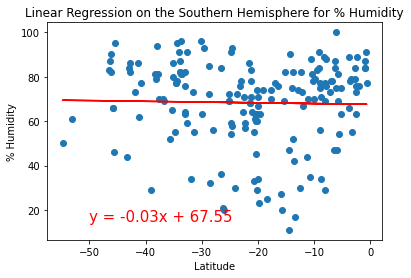

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

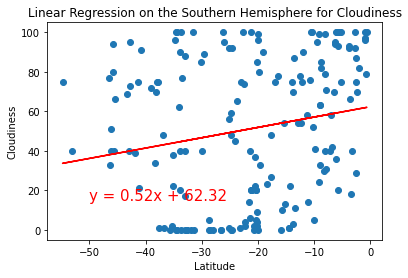

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Cloudiness', 'Cloudiness',(-50,15))

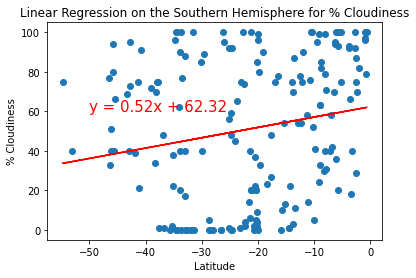

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

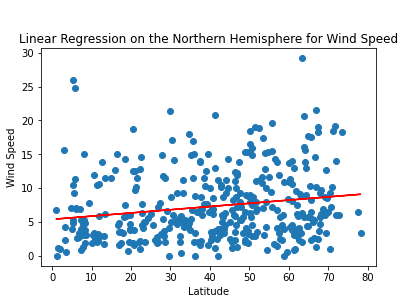

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

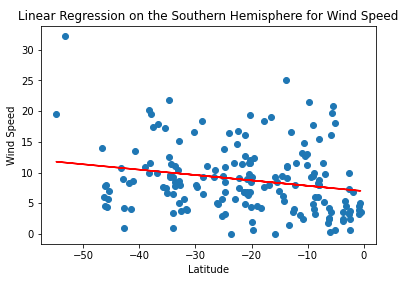

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))